# Loan Application Status Prediction

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#upload data

In [4]:
df=pd.read_csv('raw.githubusercontent.com_dsrscientist_DSData_master_loan_prediction.csv')

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
df.sample(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,LP001469,Male,No,0,Graduate,Yes,20166,0.000000,650.0,480.0,NaN,Urban,Y
274,LP001896,Male,Yes,2,Graduate,No,3900,0.000000,90.0,360.0,1.0,Semiurban,Y
282,LP001915,Male,Yes,2,Graduate,No,2301,985.799988,78.0,180.0,1.0,Urban,Y
13,LP001029,Male,No,0,Graduate,No,1853,2840.000000,114.0,360.0,1.0,Rural,N
419,LP002347,Male,Yes,0,Graduate,No,3246,1417.000000,138.0,360.0,1.0,Semiurban,Y
507,LP002625,NaN,No,0,Graduate,No,3583,0.000000,96.0,360.0,1.0,Urban,N
82,LP001267,Female,Yes,2,Graduate,No,1378,1881.000000,167.0,360.0,1.0,Urban,N
290,LP001936,Male,Yes,0,Graduate,No,3075,2416.000000,139.0,360.0,1.0,Rural,Y
17,LP001036,Female,No,0,Graduate,No,3510,0.000000,76.0,360.0,0.0,Urban,N
123,LP001432,Male,Yes,2,Graduate,No,2957,0.000000,81.0,360.0,1.0,Semiurban,Y


In [9]:
df.shape

(614, 13)

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

In [16]:
df['Gender'].fillna(df['Gender'].median(), inplace =True)

In [18]:
df['Married'].fillna(df['Married'].median(), inplace =True)

In [19]:
df['Dependents'].fillna(df['Dependents'].median(), inplace =True)

In [20]:
df['Self_Employed'].fillna(df['Self_Employed'].median(), inplace =True)

In [22]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace =True)

In [23]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace =True)

In [24]:
df['Credit_History'].fillna(df['Credit_History'].median(), inplace =True)

In [28]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

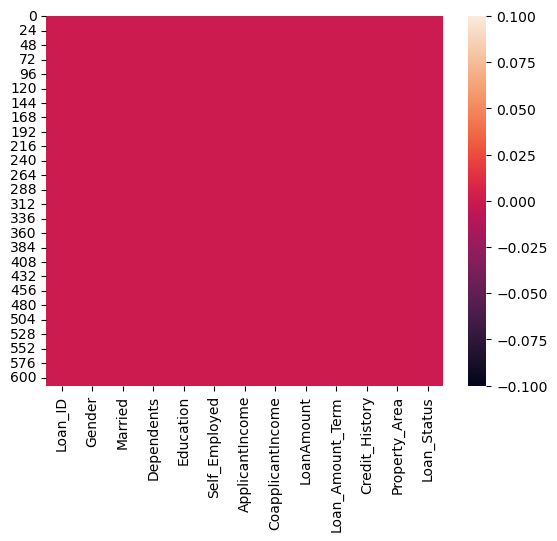

In [29]:
sns.heatmap(df.isnull())

(array([192.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 422.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

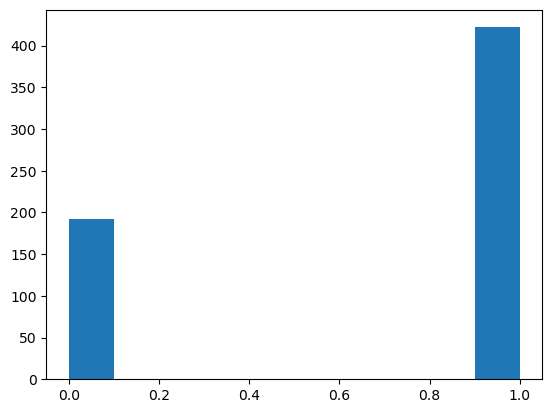

In [50]:

p=df['Loan_Status'].values
plt.hist(p)

<AxesSubplot:>

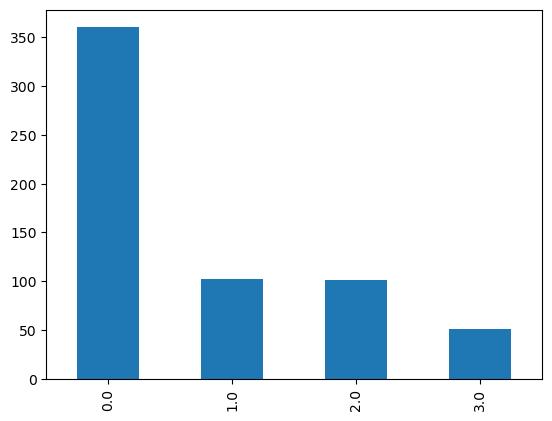

In [51]:
df['Dependents'].value_counts().plot(kind='bar')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    float64
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    float64
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    float64
 12  Loan_Status        614 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 62.5 KB


In [31]:
df = df.drop("Loan_ID", axis=1)  # Drop the Loan_ID column as it does not contribute to the prediction
df = df.dropna()  # Remove rows with missing values

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
# Convert categorical variables to numerical using label encoding
categorical_cols = ["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status"]
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Split the data into training and testing sets
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
# Train the model (Decision Tree Classifier)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [41]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7154471544715447


In [52]:
import pickle

In [53]:
filename='Loan Application Status Prediction.pkl'

In [55]:
pickle.dump(model, open(filename, 'wb'))